In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

In [2]:
# Use Pandas data frame to read csv data
Degree_Awarded_df1 = pd.read_csv("ComprehensiveData_2005-17_v1.csv")
Degree_Awarded_df1.head()

,unitid,institution name,year,DFR2005.Associate's degree,DFR2005.Bachelor's degree,DFR2005.Master's degree,DFR2005.Certificates of less-than 1-year,DFR2005.Certificates of 1 but less than 2 years,Unnamed: 8
0,100654,Alabama A & M University,2005.0,0.0,600.0,312.0,0.0,0.0,NaN
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,1223.0,0.0,12.0,NaN
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,374.0,0.0,0.0,NaN
3,100751,The University of Alabama,2005.0,0.0,2931.0,1283.0,0.0,0.0,NaN
4,100858,Auburn University,2005.0,0.0,3917.0,791.0,0.0,0.0,NaN


In [3]:
# How many institutions are we starting with?
totalInstitutions = len(Degree_Awarded_df1)
print(totalInstitutions)

33085


In [4]:
# DELETE UNWANTED COLUMNS 
Degree_Awarded_df2 = Degree_Awarded_df1.drop(["DFR2005.Master's degree", "Unnamed: 8"], axis = 1)
Degree_Awarded_df2.head()

,unitid,institution name,year,DFR2005.Associate's degree,DFR2005.Bachelor's degree,DFR2005.Certificates of less-than 1-year,DFR2005.Certificates of 1 but less than 2 years
0,100654,Alabama A & M University,2005.0,0.0,600.0,0.0,0.0
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,0.0,12.0
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,0.0,0.0
3,100751,The University of Alabama,2005.0,0.0,2931.0,0.0,0.0
4,100858,Auburn University,2005.0,0.0,3917.0,0.0,0.0


In [5]:
# RENAME COLUMNS
Degree_Awarded_df3 = Degree_Awarded_df2.rename(columns={
    "DFR2005.Associate's degree" : "Associate's Degree",
    "DFR2005.Bachelor's degree": "Bachelor's Degree", 
    "DFR2005.Certificates of less-than 1-year" : "Shorter Certificates",
    "DFR2005.Certificates of 1 but less than 2 years" : "Longer Certificates"})

Degree_Awarded_df3.head()

,unitid,institution name,year,Associate's Degree,Bachelor's Degree,Shorter Certificates,Longer Certificates
0,100654,Alabama A & M University,2005.0,0.0,600.0,0.0,0.0
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,0.0,12.0
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,0.0,0.0
3,100751,The University of Alabama,2005.0,0.0,2931.0,0.0,0.0
4,100858,Auburn University,2005.0,0.0,3917.0,0.0,0.0


In [6]:
# REMOVE ROWS WITH MISSING DATA 
Degree_Awarded_df4 = Degree_Awarded_df3.dropna(how="any")
Degree_Awarded_df4.head()

,unitid,institution name,year,Associate's Degree,Bachelor's Degree,Shorter Certificates,Longer Certificates
0,100654,Alabama A & M University,2005.0,0.0,600.0,0.0,0.0
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,0.0,12.0
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,0.0,0.0
3,100751,The University of Alabama,2005.0,0.0,2931.0,0.0,0.0
4,100858,Auburn University,2005.0,0.0,3917.0,0.0,0.0


In [7]:
institutionsMinusBlanks = len(Degree_Awarded_df4)
print(institutionsMinusBlanks)

21834


In [8]:
institutionsDeleted = totalInstitutions - institutionsMinusBlanks
print(institutionsDeleted)

11251


In [9]:
# Column rearrange    
Degree_Awarded_df5 = Degree_Awarded_df4[["unitid","year","institution name","Shorter Certificates","Longer Certificates","Associate's Degree","Bachelor's Degree"]]
Degree_Awarded_df5.head()

,unitid,year,institution name,Shorter Certificates,Longer Certificates,Associate's Degree,Bachelor's Degree
0,100654,2005.0,Alabama A & M University,0.0,0.0,0.0,600.0
1,100663,2005.0,University of Alabama at Birmingham,0.0,12.0,0.0,1622.0
2,100706,2005.0,University of Alabama in Huntsville,0.0,0.0,0.0,798.0
3,100751,2005.0,The University of Alabama,0.0,0.0,0.0,2931.0
4,100858,2005.0,Auburn University,0.0,0.0,0.0,3917.0


In [10]:
#As type to change the years type to get rid of those pesky .0 and replace the current year column with this new clean one
Degree_Awarded_df5["year"]=Degree_Awarded_df5["year"].astype(int)
Degree_Awarded_df5.head()

,unitid,year,institution name,Shorter Certificates,Longer Certificates,Associate's Degree,Bachelor's Degree
0,100654,2005,Alabama A & M University,0.0,0.0,0.0,600.0
1,100663,2005,University of Alabama at Birmingham,0.0,12.0,0.0,1622.0
2,100706,2005,University of Alabama in Huntsville,0.0,0.0,0.0,798.0
3,100751,2005,The University of Alabama,0.0,0.0,0.0,2931.0
4,100858,2005,Auburn University,0.0,0.0,0.0,3917.0


In [17]:
InstitutionYearCounts = Degree_Awarded_df5.groupby("year")["year"].count()
InstitutionYearCounts

year
2005    1685
2006    1696
2007    1695
2008    1699
2009    1703
2010    1705
2011    1702
2012    1702
2013    1688
2014    1690
2015    1684
2016    1596
2017    1589
Name: year, dtype: int64

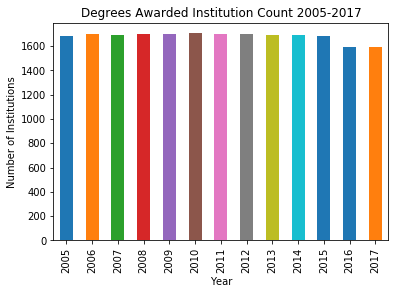

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a bar chart 
institutionCountBar = InstitutionYearCounts.plot(kind='bar')

# Set the xlabel and ylabel
institutionCountBar.set_xlabel("Year")
institutionCountBar.set_ylabel("Number of Institutions")
plt.title("Degrees Awarded Institution Count 2005-2017")
plt.savefig("Degrees Awarded Institution Count 2005-2017_fig.png")
plt.show()
plt.tight_layout()

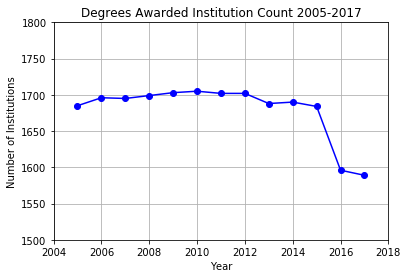

In [20]:
institutionCount = InstitutionYearCounts.plot.line(style='.-', x='index', marker ='o', color='blue')
institutionCount.set_ylim(ymin=1500, ymax=1800)
institutionCount.set_xlim(xmin=2004, xmax=2018)
plt.title("Degrees Awarded Institution Count 2005-2017")
plt.xlabel("Year")
plt.ylabel("Number of Institutions")
plt.grid()
plt.savefig("Degrees Awarded Institution Count 2005-2017_fig.png")
plt.show()

In [21]:
# Total Degrees Awarded per Year 

# Shorter Certificates
df6 = Degree_Awarded_df5.groupby(["year"])["Shorter Certificates"].sum().astype(int)

# Longer Certificates
df7 = Degree_Awarded_df5.groupby(["year"])["Longer Certificates"].sum().astype(int)

# Associate's Degree
df8 = Degree_Awarded_df5.groupby(["year"])["Associate's Degree"].sum().astype(int)

# Bachelor's degree
df9 = Degree_Awarded_df5.groupby(["year"])["Bachelor's Degree"].sum().astype(int)


# Convert to DataFrame
AwardsPerYear = pd.DataFrame({"Shorter Certificates":df6,
                     "Longer Certificates": df7,
                     "Associate's Degree": df8,
                     "Bachelor's Degree" : df9             
                    })

AwardsPerYear

,Shorter Certificates,Longer Certificates,Associate's Degree,Bachelor's Degree
year,,,,
2005,6435,11050,74434,1316168
2006,7682,10712,74941,1347340
2007,7941,9666,79003,1373060
2008,8203,9480,76969,1404895
2009,9405,11942,78072,1433088
2010,11858,10976,81353,1467433
2011,9374,14621,91299,1511783
2012,10964,12806,95050,1565139
2013,13287,12841,87874,1587285


In [22]:
# Add up Total Degree per year
summary_df = pd.concat([AwardsPerYear,pd.DataFrame(AwardsPerYear.sum(axis=1),columns=['Total_Degree'])],axis=1)
summary_df

,Shorter Certificates,Longer Certificates,Associate's Degree,Bachelor's Degree,Total_Degree
year,,,,,
2005,6435,11050,74434,1316168,1408087
2006,7682,10712,74941,1347340,1440675
2007,7941,9666,79003,1373060,1469670
2008,8203,9480,76969,1404895,1499547
2009,9405,11942,78072,1433088,1532507
2010,11858,10976,81353,1467433,1571620
2011,9374,14621,91299,1511783,1627077
2012,10964,12806,95050,1565139,1683959
2013,13287,12841,87874,1587285,1701287


In [28]:
# Set index for the plots below to work
summary_df = summary_df.reset_index()
summary_df

,index,year,Shorter Certificates,Longer Certificates,Associate's Degree,Bachelor's Degree,Total_Degree
0,0,2005,6435,11050,74434,1316168,1408087
1,1,2006,7682,10712,74941,1347340,1440675
2,2,2007,7941,9666,79003,1373060,1469670
3,3,2008,8203,9480,76969,1404895,1499547
4,4,2009,9405,11942,78072,1433088,1532507
5,5,2010,11858,10976,81353,1467433,1571620
6,6,2011,9374,14621,91299,1511783,1627077
7,7,2012,10964,12806,95050,1565139,1683959
8,8,2013,13287,12841,87874,1587285,1701287
9,9,2014,13681,14177,81362,1611376,1720596


In [ ]:
#stacked bar******************************************

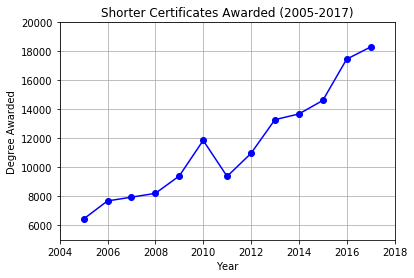

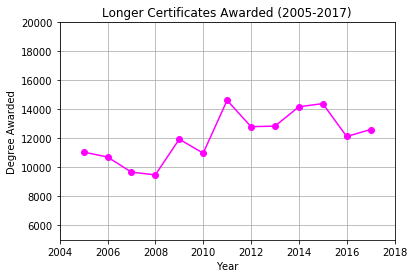

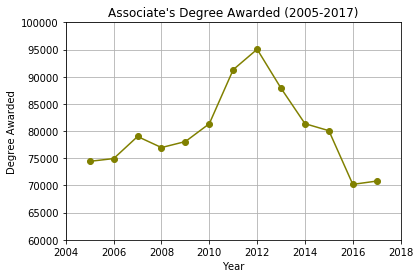

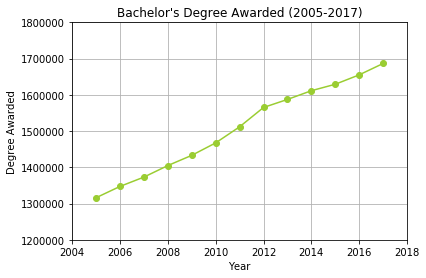

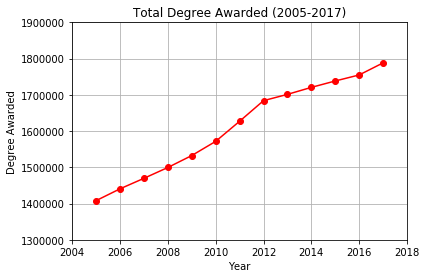

In [77]:
#time series line plots for initial jobless claims
xc=summary_df["year"]
yc=summary_df["Shorter Certificates"]
plt.plot(xc,yc, color="blue",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([5000, 20000])
plt.title("Shorter Certificates Awarded (2005-2017)")
plt.grid()
plt.savefig("Shorter Certificates Awarded (2005-2017)")
plt.show()

xc=summary_df["year"]
yc=summary_df["Longer Certificates"]
plt.plot(xc,yc, color="magenta",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([5000, 20000])
plt.title("Longer Certificates Awarded (2005-2017)")
plt.grid()
plt.savefig("Longer Certificates Awarded (2005-2017)")
plt.show()

xc=summary_df["year"]
yc=summary_df["Associate's Degree"]
plt.plot(xc,yc, color="olive",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([60000, 100000])
plt.title("Associate's Degree Awarded (2005-2017)")
plt.grid()
plt.savefig("Associate's Degree Awarded (2005-2017)")
plt.show()

xc=summary_df["year"]
yc=summary_df["Bachelor's Degree"]
plt.plot(xc,yc, color="yellowgreen",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([1200000, 1800000])
plt.title("Bachelor's Degree Awarded (2005-2017)")
plt.grid()
plt.savefig("Bachelor's Degree Awarded (2005-2017)")
plt.show()

xc=summary_df["year"]
yc=summary_df["Total_Degree"]
plt.plot(xc,yc, color="red",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([1300000, 1900000])
plt.title("Total Degree Awarded (2005-2017)")
plt.grid()
plt.savefig("Total Degree Awarded (2005-2017)")
plt.show()

In [82]:
TotalAwardsPerYear = AwardsPerYear.sum()
TotalAwardsPerYear

Shorter Certificates      149203
Longer Certificates       157400
Associate's Degree       1041429
Bachelor's Degree       19588344
dtype: int64

In [83]:
df = pd.DataFrame({'Program Type':TotalAwardsPerYear.index, 'Awarded Total':TotalAwardsPerYear.values})
df

,Program Type,Awarded Total
0,Shorter Certificates,149203
1,Longer Certificates,157400
2,Associate's Degree,1041429
3,Bachelor's Degree,19588344
